In [1]:
user = "Alex"
pathtorepo = "C:\\Users\\" * user * "\\Desktop\\"

using Pkg
Pkg.activate(pathtorepo * "dynamical-systems\\env\\integrate\\")
include("C:\\Users\\" * user * "\\Desktop\\dynamical-systems\\system.jl")
include("C:\\Users\\" * user * "\\Desktop\\dynamical-systems\\visual_regimes.jl");

  Activating project at `C:\Users\Alex\Desktop\dynamical-systems\env\integrate`


In [2]:
using StaticArrays, DifferentialEquations, DynamicalSystems
E, x, y  = -40..40, -5..5,  -5..5
box = E × x × y
using CairoMakie, GLMakie
using LinearAlgebra

In [3]:
const τ = 0.013;  const τD = 0.07993;  const τy = 3.3;  const J = 3.07;  const β = 0.300
const xthr = 0.75; const ythr = 0.4
const α = 1.58; const ΔU0 = 0.305; 

In [4]:
time = 1000; tt = 1000; tstep = 0.001; times = [time, tt]
integ_set = (alg = Vern9(), adaptive = false, dt = tstep);

In [278]:
# chaotic non hom I0 = -1.7005; U0 = 0.26505

I0 = -1.728; U0 = 0.282

p = SA[α, τ, τD, τy, J, xthr, ythr, U0, ΔU0, β, I0]
u0_1 = [10.739373436055542, 0.675053327961428, 0.44308612785116175] #[4.563436676974208, 0.8269388602301391, 0.44101854388786665];

3-element Vector{Float64}:
 10.739373436055542
  0.675053327961428
  0.44308612785116175

In [279]:
ds = CoupledODEs(TM, u0_1, p, diffeq = integ_set)

3-dimensional CoupledODEs
 deterministic: true
 discrete time: false
 in-place:      false
 dynamic rule:  TM
 ODE solver:    Vern9
 ODE kwargs:    (adaptive = false, dt = 0.001)
 parameters:    [1.58, 0.013, 0.07993, 3.3, 3.07, 0.75, 0.4, 0.282, 0.305, 0.3, -1.728]
 time:          0.0
 state:         [10.739373436055542, 0.675053327961428, 0.44308612785116175]


In [280]:
fp, ei, _ = fixedpoints(ds, box, jacob_TM_);

In [281]:
idx = 1
Jac = jacob_TM_(fp[idx], p, 0)
eivecs = eigvecs(Jac)
shift = real(eivecs[:, 1])*1e-7 + fp[idx]

3-element SVector{3, Float64} with indices SOneTo(3):
 8.3845755021405
 0.7369151686230455
 0.4305972484396863

In [282]:
prob = ODEProblem(TM, u0_1, (0.0, 1000), p)
sol = solve(prob, alg = Vern9(), adaptive = false, dt = 0.001);

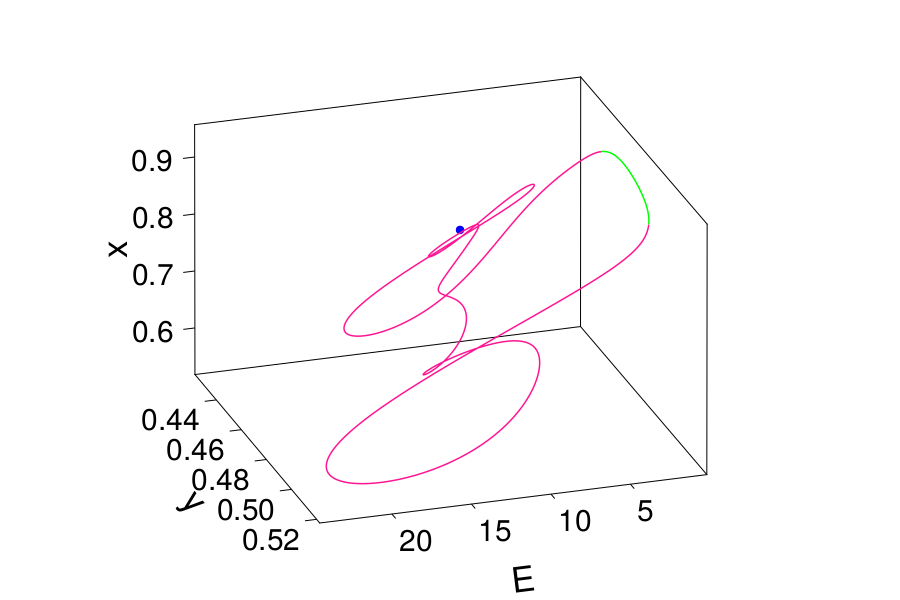

CairoMakie.Screen{IMAGE}


In [299]:
ts1, tf1 = 809650, 811790
ts2, tf2 = 809300, 809650

idx, idy, idz = 1, 3, 2
lb_size = 35; tck_size = 30;
dis  = 60;

CairoMakie.activate!()
f = Figure(resolution = (900, 600))
ax = Axis3(f[1, 1], azimuth = 0.4pi,
            xlabel = "E", ylabel = "y", zlabel = "x",
            xlabelsize = lb_size, ylabelsize = lb_size, zlabelsize = lb_size,
            xticklabelsize = tck_size, yticklabelsize = tck_size, zticklabelsize = tck_size,
            xgridvisible = false, ygridvisible = false, zgridvisible = false,
            protrusions = dis, xlabeloffset = dis, ylabeloffset = dis, zlabeloffset = dis)


for (i, ep) in enumerate(fp)
    scatter!(ep[idx], ep[idy], ep[idz], color = :blue, markersize = 12)
end

lines!(sol[idx,ts2:tf2], sol[idy,ts2:tf2], sol[idz,ts2:tf2], linewidth = 1.5, color = :lime)
lines!(sol[idx,ts1:tf1], sol[idy,ts1:tf1], sol[idz,ts1:tf1], linewidth = 1.5, color = :deeppink)

display(f)

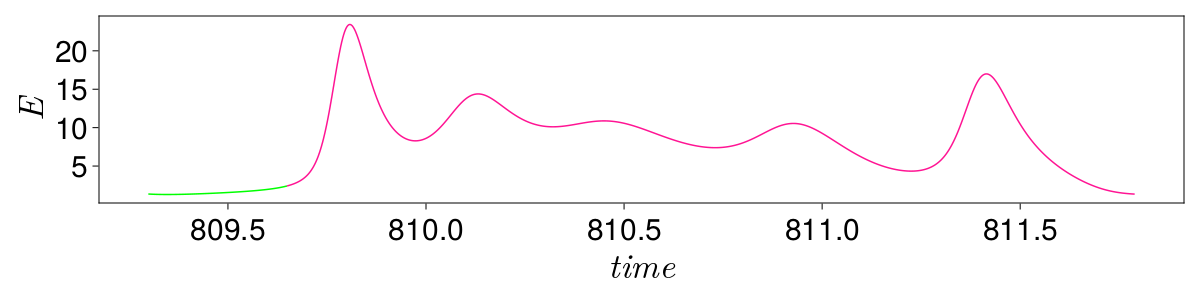

In [300]:
CairoMakie.activate!()
f = Figure(resolution = (1200, 300))
axistm = Axis(f[1, 1], xlabel = L"$time$", ylabel = L"$E$",
            xlabelsize = lb_size, ylabelsize = lb_size,
            xticklabelsize = tck_size, yticklabelsize = tck_size,
            xgridvisible = false, ygridvisible = false)

lines!(sol.t[ts2:tf2], sol[idx,ts2:tf2], linewidth = 1.5, color = :lime)
lines!(sol.t[ts1:tf1], sol[idx,ts1:tf1], linewidth = 1.5, color = :deeppink)
f

In [64]:
#save("C:\\Users\\Alex\\Desktop\\phase_second_type_activity.pdf", f)

In [22]:
#save("C:\\Users\\Alex\\Desktop\\ts_second_type_activity.pdf", f)

CairoMakie.Screen{PDF}
